<a href="https://colab.research.google.com/github/edercarmonaa/IntroIA/blob/main/Sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

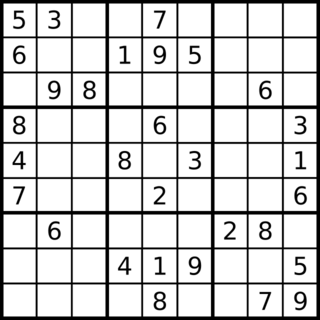
Para resolver el Sudoku utilizando búsqueda ciega con árboles y las librerías anytree y numpy, podemos implementar los algoritmos de búsqueda en anchura (BFS), búsqueda en profundidad (DFS) e iterative deepening depth-first search (IDDFS). A continuación, te presento un ejemplo de cómo hacerlo.

Es importante tener en cuenta que aunque la búsqueda ciega puede resolver estos problemas, no siempre es la estrategia más eficiente, especialmente en problemas de gran complejidad. En la práctica, se suelen utilizar técnicas de búsqueda informada (como la búsqueda heurística) para mejorar el rendimiento en problemas más grandes o complejos.

Antes de mostrar el código, es importante mencionar que esta implementación podría ser muy lenta para tableros con muchas casillas vacías, ya que tendría que probar muchas combinaciones hasta encontrar la solución.

Dicho esto, aquí tienes un ejemplo de código Python para resolver el Sudoku utilizando búsqueda ciega:

Primero, asegúrate de tener instaladas las librerías anytree y numpy. Puedes instalarlas usando pip si aún no lo has hecho:

In [ ]:
pip install anytree


Importamos las librerías necesarias

In [ ]:
import numpy as np
from anytree import Node, RenderTree
from collections import deque
import time
import resource

Primero definimos dos funciones auxiliares, is_valid que valida si se puede colocar un numero en una celda sin violar las reglas del sudoku, y la función find_empty, busca las celdas vacías dentro del tablero

In [ ]:
def is_valid(board, num, row, col):
    # Verificar si el número se puede colocar en la posición (fila, columna)
    # sin violar las reglas del Sudoku.
    for i in range(9):
        if board[row][i] == num or board[i][col] == num:
            return False

    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(3):
        for j in range(3):
            if board[start_row + i][start_col + j] == num:
                return False
    return True

def find_empty(board):
    # Encontrar la primera celda vacía del tablero.
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return i, j
    return None, None


La función solve_sudoku_bfs es la implementación de búsqueda en anchura (BFS) para resolver el Sudoku utilizando un enfoque de búsqueda ciega con árboles. En este método, exploramos todos los posibles estados del tablero del Sudoku en un orden nivel por nivel, es decir, primero exploramos todos los posibles tableros después de un solo movimiento, luego todos los posibles tableros después de dos movimientos y así sucesivamente.

In [ ]:
def solve_sudoku_bfs(board):
    root = Node("Root", board=board)
    queue = deque([root])

    while queue:
        node = queue.popleft()
        empty_row, empty_col = find_empty(node.board)

        if empty_row is None or empty_col is None:
            # No hay celdas vacías, el tablero está resuelto.
            return node.board

        for num in range(1, 10):
            if is_valid(node.board, num, empty_row, empty_col):
                new_board = np.copy(node.board)
                new_board[empty_row][empty_col] = num
                child_node = Node("({}, {}) = {}".format(empty_row, empty_col, num), parent=node, board=new_board)
                queue.append(child_node)

La función solve_sudoku_dfs es la implementación de búsqueda en profundidad (DFS) para resolver el Sudoku utilizando un enfoque de búsqueda ciega con árboles. En este método, exploramos todos los posibles estados del tablero del Sudoku siguiendo un camino en profundidad hasta llegar a una solución o hasta que no haya más movimientos posibles, en cuyo caso retrocedemos (backtrack) a un estado anterior y seguimos explorando otros caminos.

In [ ]:
def solve_sudoku_dfs(board):
    root = Node("Root", board=board)
    stack = [root]

    while stack:
        node = stack.pop()
        empty_row, empty_col = find_empty(node.board)

        if empty_row is None or empty_col is None:
            # No hay celdas vacías, el tablero está resuelto.
            return node.board

        for num in range(1, 10):
            if is_valid(node.board, num, empty_row, empty_col):
                new_board = np.copy(node.board)
                new_board[empty_row][empty_col] = num
                child_node = Node("({}, {}) = {}".format(empty_row, empty_col, num), parent=node, board=new_board)
                stack.append(child_node)

La función solve_sudoku_iddfs es la implementación de búsqueda en profundidad iterativa (IDDFS) para resolver el Sudoku utilizando un enfoque de búsqueda ciega con árboles. La IDDFS combina las ventajas de la búsqueda en profundidad (DFS) y la búsqueda en anchura (BFS) al ejecutar varias iteraciones de búsqueda en profundidad con límites incrementales en la profundidad máxima de búsqueda.

In [ ]:
def solve_sudoku_iddfs(board):
    max_depth = 0
    root = Node("Root", board=board)

    while True:
        stack = [root]
        while stack:
            node = stack.pop()
            if node.depth == max_depth:
                continue

            empty_row, empty_col = find_empty(node.board)

            if empty_row is None or empty_col is None:
                # No hay celdas vacías, el tablero está resuelto.
                return node.board

            for num in range(1, 10):
                if is_valid(node.board, num, empty_row, empty_col):
                    new_board = np.copy(node.board)
                    new_board[empty_row][empty_col] = num
                    child_node = Node("({}, {}) = {}".format(empty_row, empty_col, num), parent=node, board=new_board)
                    stack.append(child_node)

        max_depth += 1

Para medir el tiempo de ejecución y el consumo de recursos de las funciones de resolución del Sudoku (BFS, DFS e IDDFS), utilizaremos el módulo time para registrar el tiempo de inicio y finalización de cada función y el módulo resource para medir el consumo de recursos.

In [ ]:
# Ejemplo de tablero Sudoku (0 representa celdas vacías)
sudoku_board = np.array([
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
])

# Resolver el Sudoku utilizando BFS
start_time = time.time()
start_resources = resource.getrusage(resource.RUSAGE_SELF)
result_bfs = solve_sudoku_bfs(sudoku_board)
end_time = time.time()
end_resources = resource.getrusage(resource.RUSAGE_SELF)
execution_time_bfs = end_time - start_time
consumed_resources_bfs = end_resources.ru_maxrss - start_resources.ru_maxrss

print("Resolución usando BFS:")
print(result_bfs)
print(f"Tiempo de ejecución: {execution_time_bfs:.6f} segundos")
print(f"Consumo de recursos: {consumed_resources_bfs} KB")

# Resolver el Sudoku utilizando DFS
start_time = time.time()
start_resources = resource.getrusage(resource.RUSAGE_SELF)
result_dfs = solve_sudoku_dfs(sudoku_board)
end_time = time.time()
end_resources = resource.getrusage(resource.RUSAGE_SELF)
execution_time_dfs = end_time - start_time
consumed_resources_dfs = end_resources.ru_maxrss - start_resources.ru_maxrss

print("\nResolución usando DFS:")
print(result_dfs)
print(f"Tiempo de ejecución: {execution_time_dfs:.6f} segundos")
print(f"Consumo de recursos: {consumed_resources_dfs} KB")

# Resolver el Sudoku utilizando IDDFS
start_time = time.time()
start_resources = resource.getrusage(resource.RUSAGE_SELF)
result_iddfs = solve_sudoku_iddfs(sudoku_board)
end_time = time.time()
end_resources = resource.getrusage(resource.RUSAGE_SELF)
execution_time_iddfs = end_time - start_time
consumed_resources_iddfs = end_resources.ru_maxrss - start_resources.ru_maxrss

print("\nResolución usando IDDFS:")
print(result_iddfs)
print(f"Tiempo de ejecución: {execution_time_iddfs:.6f} segundos")
print(f"Consumo de recursos: {consumed_resources_iddfs} KB")


En este código, hemos agregado el registro del tiempo y el consumo de recursos antes y después de cada función de resolución del Sudoku (BFS, DFS e IDDFS). Al final de cada ejecución, imprimimos el tablero resuelto, el tiempo de ejecución y el consumo de recursos (medido en kilobytes, KB).

El consumo de recursos se mide utilizando la función resource.getrusage(resource.RUSAGE_SELF), que proporciona información sobre los recursos utilizados por el proceso actual. La diferencia entre los valores antes y después de la función nos da el consumo de recursos durante la ejecución de esa función.

Recuerda que el tiempo de ejecución y el consumo de recursos pueden variar según la plataforma y la carga del sistema. Si estás ejecutando este código en un entorno en línea, es posible que no obtengas valores precisos de consumo de recursos debido a las limitaciones del entorno. Sin embargo, deberías poder obtener tiempos de ejecución válidos.